In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
coin_tosses=(np.random.rand(1000,12)<0.51).astype(np.int)
np.cumsum(coin_tosses,axis=0)

array([[  0,   1,   1, ...,   1,   0,   1],
       [  0,   1,   1, ...,   1,   0,   2],
       [  0,   1,   2, ...,   1,   0,   3],
       ...,
       [502, 525, 496, ..., 513, 489, 520],
       [502, 525, 496, ..., 514, 489, 520],
       [503, 525, 497, ..., 515, 490, 521]], dtype=int32)

In [3]:
import sklearn.datasets as dataset
make_moon=dataset.make_moons(n_samples=500,noise=0.4,random_state=42)
X=make_moon[0]
y=make_moon[1]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [5]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import VotingClassifier

In [6]:
svm_clf=SVC(probability=True)
log_clf=LogisticRegression()
rand_clf=RandomForestClassifier()

In [7]:
from sklearn.preprocessing import StandardScaler
std_scale=StandardScaler()
X_train=std_scale.fit_transform(X_train)
X_test=std_scale.fit_transform(X_test)

In [8]:
voting_clf=VotingClassifier([('lr',log_clf),
                             ('svm',svm_clf),
                             ('rand',rand_clf)],voting='soft')

In [9]:
from sklearn.metrics import accuracy_score
for clf in (svm_clf,log_clf,rand_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_predict=clf.predict(X_test)
    print(f"{clf.__class__.__name__}:{accuracy_score(y_test,y_predict)}")

SVC:0.82
LogisticRegression:0.84
RandomForestClassifier:0.81
VotingClassifier:0.84


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [10]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bagg_clf=BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,max_samples=100,bootstrap=False,n_jobs=-1)
bagg_clf.fit(X_train,y_train)
y_pred=bagg_clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.83


In [11]:
bagg_clf=BaggingClassifier(DecisionTreeClassifier(),n_estimators=200,max_samples=100,bootstrap=True,n_jobs=-1)
bagg_clf.fit(X_train,y_train)
y_bagg_pred=bagg_clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_bagg_pred))

Accuracy: 0.84


In [12]:
tree_clf=DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_tree_pred=tree_clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_tree_pred))

Accuracy: 0.78


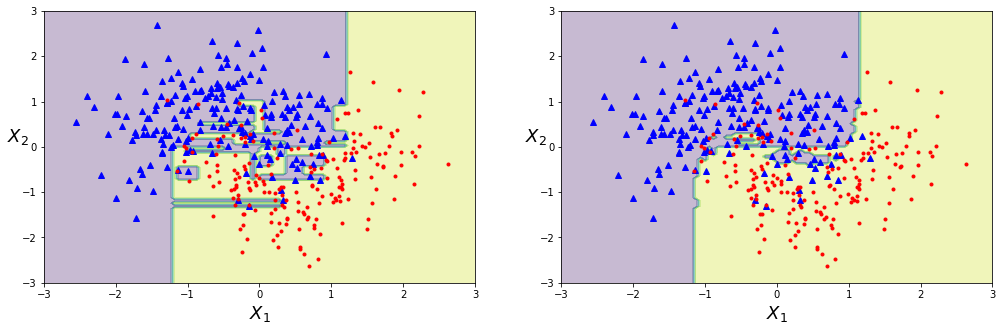

In [13]:
plt.figure(figsize=(17,5))
plt.subplot(121)
x1_=np.linspace(-3,3,100)
x2_=np.linspace(-3,3,100)
X1,X2=np.meshgrid(x1_,x2_)
X_new=np.c_[X1.ravel(),X2.ravel()]
y_tree1_predict=tree_clf.predict(X_new).reshape(100,100)
plt.contourf(x1_,x2_,y_tree1_predict,alpha=0.3)
plt.plot(X_train[:,0][y_train==0],X_train[:,1][y_train==0],"b^")
plt.plot(X_train[:,0][y_train==1],X_train[:,1][y_train==1],"r.")
plt.axis([-3,3,-3,3])
plt.xlabel(r"$X_1$",rotation=0,fontsize=18)
plt.ylabel(r"$X_2$",rotation=0,fontsize=18)

plt.subplot(122)
x3_=np.linspace(-3,3,100)
x4_=np.linspace(-3,3,100)
X3,X4=np.meshgrid(x3_,x4_)
X_nop=np.c_[X3.ravel(),X4.ravel()]
y_bagg1_predict=bagg_clf.predict(X_nop).reshape(100,100)
plt.contourf(x3_,x4_,y_bagg1_predict,alpha=0.3)
plt.plot(X_train[:,0][y_train==0],X_train[:,1][y_train==0],"b^")
plt.plot(X_train[:,0][y_train==1],X_train[:,1][y_train==1],"r.")
plt.xlabel(r"$X_1$",fontsize=18)
plt.ylabel(r"$X_2$",rotation=0,fontsize=18)
plt.axis([-3,3,-3,3])

plt.show()

In [14]:
bagg_clf=BaggingClassifier(DecisionTreeClassifier(),n_estimators=500, max_samples=100, n_jobs=-1, oob_score=True)
bagg_clf.fit(X_train,y_train)
predict=bagg_clf.predict(X_test)

In [15]:
print(f"{bagg_clf.oob_score_}, {accuracy_score(predict,y_test)}")

0.845, 0.84


In [16]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf=RandomForestClassifier(n_estimators=500,max_leaf_nodes=16, random_state=42, n_jobs=-1)
rnd_clf.fit(X_train,y_train)
y_pre=rnd_clf.predict(X_test)
print(f"Accuracy={accuracy_score(y_test,y_pre)}")

Accuracy=0.86


In [17]:
rand_bagg=BaggingClassifier(DecisionTreeClassifier(splitter='random', max_leaf_nodes=16, random_state=42), n_estimators=500, 
                           bootstrap=True, bootstrap_features=True, max_samples=1.0, n_jobs=-1)
rand_bagg.fit(X_train,y_train)
y_rand_pre=rand_bagg.predict(X_test)
print(f"Accuracy={accuracy_score(y_test,y_rand_pre)}")

Accuracy=0.84


In [18]:
feature_bagg=BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=1.0, n_jobs=-1, bootstrap_features=True, bootstrap=False)
feature_bagg.fit(X_train,y_train)
y_feature_pre=feature_bagg.predict(X_test)
print(f"Accuracy={accuracy_score(y_test,y_feature_pre)}")

Accuracy=0.78


In [19]:
iris=dataset.load_iris()
X=iris['data']
y=iris['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [20]:
rnd_clf=RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(X_train,y_train)
for name, score in zip(iris['feature_names'],rnd_clf.feature_importances_):
    print(f"{name}:{score*100}")

sepal length (cm):10.320975256286859
sepal width (cm):3.813917682924026
petal length (cm):42.761439514822726
petal width (cm):43.10366754596641


In [21]:
mnist=dataset.fetch_openml('mnist_784', version=1)
X=mnist['data']
y=mnist['target']

In [22]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42)

In [23]:
rnd_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

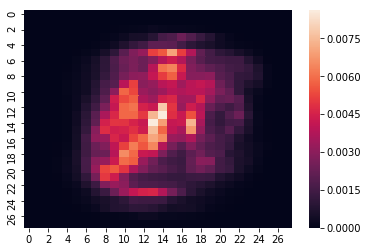

In [24]:
import seaborn as sns
sns.heatmap(rnd_clf.feature_importances_.reshape(28,28))

In [25]:
y_predict=rnd_clf.predict(X_test)
print(accuracy_score(y_test,y_predict))

0.9678857142857142


In [26]:
from sklearn.ensemble import AdaBoostClassifier
adaboost=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2,min_samples_split=50), n_estimators=500,algorithm="SAMME.R", learning_rate=0.5)

In [27]:
np.random.seed(42)
X=iris['data'][:,(2,3)]
y=iris['target']

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
adaboost.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=2, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=50, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=0.5, n_estimators=500, random_state=None)

In [29]:
y_predict=adaboost.predict(X_test)
print(f"accuracy is {accuracy_score(y_test,y_predict)}")

accuracy is 1.0


In [30]:
moons=dataset.make_moons(n_samples=1000,noise=0.4,random_state=42)
X=moons[0]
y=moons[1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

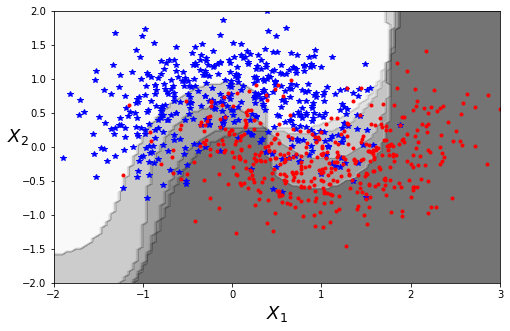

In [31]:
m=len(X_train)
sample_weights=np.ones(m)
plt.figure(figsize=(8,5))
plt.subplot(111)
plt.plot(X_train[:,0][y_train==0],X_train[:,1][y_train==0],"b*")
plt.plot(X_train[:,0][y_train==1],X_train[:,1][y_train==1],"r.")
plt.xlabel(r"$X_1$",fontsize=18)
plt.ylabel(r"$X_2$",fontsize=18,rotation=0)
plt.axis([-2,3,-2,2])
svm_clf=SVC(kernel='rbf', C=0.05, gamma="scale", random_state=42)
svm_clf.fit(X_train,y_train,sample_weight=sample_weights)
y_predict=svm_clf.predict(X_train)
sample_weights[y_predict!=y_train]*=(1+1)

x1_=np.linspace(-2,3,100)
x2_=np.linspace(-2,2,100)
X1,X2=np.meshgrid(x1_,x2_)
newX=np.c_[X1.ravel(),X2.ravel()]
Ny_predict=svm_clf.predict(newX).reshape(100,100)
plt.contourf(X1,X2,Ny_predict,cmap=plt.cm.Greys, alpha=0.2)

svm_clf.fit(X_train,y_train,sample_weight=sample_weights)
x3_=np.linspace(-2,3,100)
x4_=np.linspace(-2,2,100)
X3,X4=np.meshgrid(x3_,x4_)
newX1=np.c_[X3.ravel(),X4.ravel()]
Ny_predict1=svm_clf.predict(newX1).reshape(100,100)
plt.contourf(X3,X4,Ny_predict1,cmap=plt.cm.Greys, alpha=0.2)
sample_weights[y_predict!=y_train]*=(1+1)

svm_clf.fit(X_train,y_train,sample_weight=sample_weights)
x5_=np.linspace(-2,3,100)
x6_=np.linspace(-2,2,100)
X5,X6=np.meshgrid(x5_,x6_)
newX2=np.c_[X5.ravel(),X6.ravel()]
Ny_predict2=svm_clf.predict(newX2).reshape(100,100)
plt.contourf(X5,X6,Ny_predict2,cmap=plt.cm.Greys, alpha=0.2)
sample_weights[y_predict!=y_train]*=(1+1)

svm_clf.fit(X_train,y_train,sample_weight=sample_weights)
x5_=np.linspace(-2,3,100)
x6_=np.linspace(-2,2,100)
X5,X6=np.meshgrid(x5_,x6_)
newX2=np.c_[X5.ravel(),X6.ravel()]
Ny_predict2=svm_clf.predict(newX2).reshape(100,100)
plt.contourf(X5,X6,Ny_predict2,cmap=plt.cm.Greys, alpha=0.2)


plt.show()

In [32]:
np.random.seed(42)
X=np.random.rand(100,1)-0.5
y= 3*X[:,0]**2+0.05*np.random.randn(100)

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
tree_reg=DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X,y)
y1=tree_reg.predict(X)

In [34]:
y2=y-y1
tree_reg2=DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X,y2)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [35]:
y3=y2-tree_reg2.predict(X)
tree_reg3=DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X,y3)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [36]:
y4=y3-tree_reg3.predict(X)
tree_reg4=DecisionTreeRegressor(max_depth=2)
tree_reg4.fit(X,y4)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [37]:
X_new=np.array([[0.8]])
y_predict=sum(tree.predict(X_new) for tree in (tree_reg,tree_reg2,tree_reg3,tree_reg4))

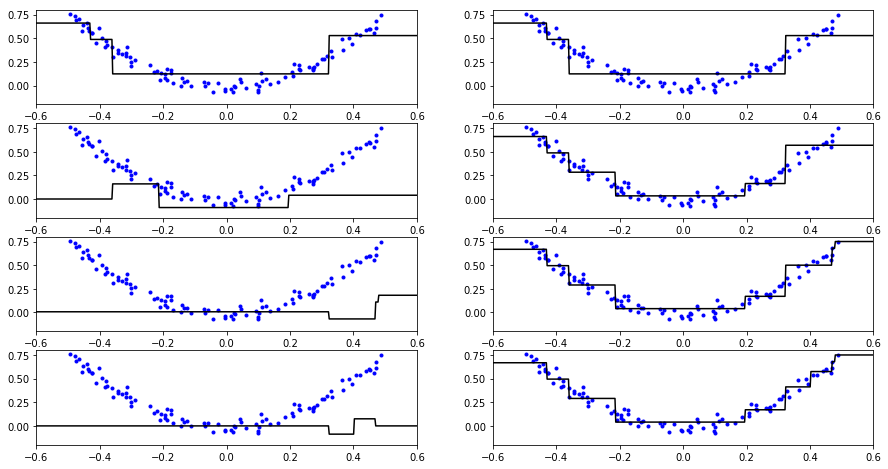

In [38]:
plt.figure(figsize=(15,8))
plt.subplot(421)
x1=np.linspace(-0.6,0.6,500).reshape(-1,1)
y_predict1=tree_reg.predict(x1)
plt.plot(X[:,0],y,"b.")
plt.plot(x1[:,0],y_predict1,"k-")
plt.axis([-0.6,0.6,-0.2,0.8])

plt.subplot(422)
x1=np.linspace(-0.6,0.6,500).reshape(-1,1)
y_predict1=tree_reg.predict(x1)
plt.plot(X[:,0],y,"b.")
plt.plot(x1[:,0],y_predict1,"k-")
plt.axis([-0.6,0.6,-0.2,0.8])

plt.subplot(423)
x1=np.linspace(-0.6,0.6,500).reshape(-1,1)
y_predict1=tree_reg2.predict(x1)
plt.plot(X[:,0],y,"b.")
plt.plot(x1[:,0],y_predict1,"k-")
plt.axis([-0.6,0.6,-0.2,0.8])

plt.subplot(424)
x1=np.linspace(-0.6,0.6,500).reshape(-1,1)
y_predict1=sum(tree.predict(x1) for tree in (tree_reg,tree_reg2))
plt.plot(X[:,0],y,"b.")
plt.plot(x1[:,0],y_predict1,"k-")
plt.axis([-0.6,0.6,-0.2,0.8])

plt.subplot(425)
x1=np.linspace(-0.6,0.6,500).reshape(-1,1)
y_predict1=tree_reg3.predict(x1)
plt.plot(X[:,0],y,"b.")
plt.plot(x1[:,0],y_predict1,"k-")
plt.axis([-0.6,0.6,-0.2,0.8])

plt.subplot(426)
x1=np.linspace(-0.6,0.6,500).reshape(-1,1)
y_predict1=sum(tree.predict(x1) for tree in (tree_reg,tree_reg2,tree_reg3))
plt.plot(X[:,0],y,"b.")
plt.plot(x1[:,0],y_predict1,"k-")
plt.axis([-0.6,0.6,-0.2,0.8])

plt.subplot(427)
x1=np.linspace(-0.6,0.6,500).reshape(-1,1)
y_predict1=tree_reg4.predict(x1)
plt.plot(X[:,0],y,"b.")
plt.plot(x1[:,0],y_predict1,"k-")
plt.axis([-0.6,0.6,-0.2,0.8])

plt.subplot(428)
x1=np.linspace(-0.6,0.6,500).reshape(-1,1)
y_predict1=sum(tree.predict(x1) for tree in (tree_reg,tree_reg2,tree_reg3,tree_reg4))
plt.plot(X[:,0],y,"b.")
plt.plot(x1[:,0],y_predict1,"k-")
plt.axis([-0.6,0.6,-0.2,0.8])

plt.show()

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_reg=GradientBoostingRegressor(max_depth=2,n_estimators=10,learning_rate=1)
gbr_reg1=GradientBoostingRegressor(max_depth=2,n_estimators=50,learning_rate=0.11)
gbr_reg.fit(X,y)
gbr_reg1.fit(X,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.11, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

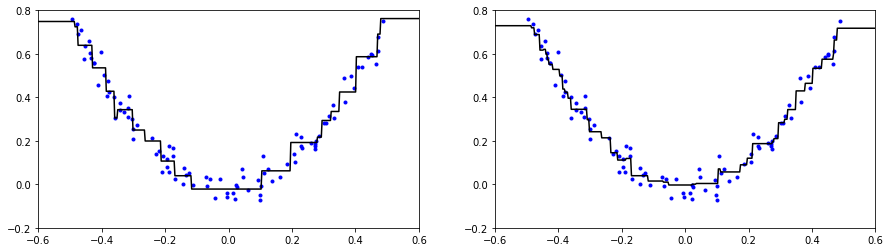

In [40]:
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(X[:,0],y,"b.")
plt.axis([-0.6,0.6,-0.2,0.8])
x1=np.linspace(-0.6,0.6,500)
y_predict=gbr_reg.predict(x1.reshape(-1,1))
plt.plot(x1,y_predict,"k-")

plt.subplot(122)
plt.plot(X[:,0],y,"b.")
plt.axis([-0.6,0.6,-0.2,0.8])
x1=np.linspace(-0.6,0.6,500)
y_predict=gbr_reg1.predict(x1.reshape(-1,1))
plt.plot(x1,y_predict,"k-")

plt.show()

In [41]:
import os
filepath="datasets\housing\housing.csv"
housing=pd.read_csv(filepath)
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [42]:
from sklearn.model_selection import StratifiedShuffleSplit

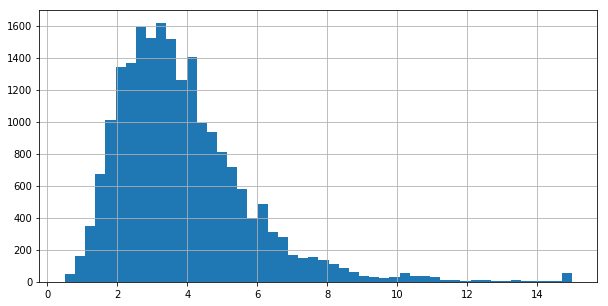

In [43]:
housing.median_income.hist(bins=50, figsize=(10,5))
plt.show()

In [44]:
housing['median_income_cat']=pd.cut(housing.median_income, bins=[0.0,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5])

In [45]:
housing.median_income_cat.value_counts()/len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: median_income_cat, dtype: float64

In [46]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
split_index=split.split(housing,housing['median_income_cat'])

for train_index, test_index in split_index:
    X_train=housing.iloc[train_index]
    X_test=housing.iloc[test_index]

In [47]:
y_train=X_train['median_house_value']
y_test=X_test['median_house_value']

for set_ in (X_train,X_test):
    set_.drop("median_house_value",axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [48]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# hot_encode=OneHotEncoder()
# housing_ocean_proximity_encode=hot_encode.fit_transform(X_train[['ocean_proximity']])

In [49]:
shuffled_indices=np.random.permutation(len(X_train))
val_size=int(0.2*len(X_train))
XS_val=X_train.iloc[shuffled_indices[:val_size]]
XS_train=X_train.iloc[shuffled_indices[val_size:]]
ys_val=y_train.iloc[shuffled_indices[:val_size]]
ys_train=y_train.iloc[shuffled_indices[val_size:]]

In [50]:
def manual_imputer(data):
    na_data=data[data.isna().any(axis=1)]
    for i in range(len(na_data)):
        test_index=na_data.index[i]
        test=na_data.iloc[i]
        column_name=test[test.isna()==True].index[0]
        on_column=test['ocean_proximity']
        impute_value=housing.groupby(by='ocean_proximity').median()[column_name][on_column]
        data.loc[test_index,column_name]=impute_value
    return data

In [51]:
XSI_train,XSI_val=manual_imputer(XS_train),manual_imputer(XS_val)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [52]:
from sklearn.preprocessing import StandardScaler
try:
    XSI_train.drop('median_income_cat',axis='columns',inplace=True)
except:
    pass
all_attributes=XSI_train.columns
num_attributes=list(set(all_attributes)-{'ocean_proximity'})
cat_attribute=['ocean_proximity']

num_pipeline=Pipeline([('std_scaler',StandardScaler())])

full_pipeline=ColumnTransformer([('num',num_pipeline,num_attributes),
                                 ('cat',OneHotEncoder(),cat_attribute)])

train=full_pipeline.fit_transform(XSI_train)
val=full_pipeline.fit_transform(XSI_val)
test=full_pipeline.fit_transform(X_test)

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_reg=GradientBoostingRegressor(max_depth=2,n_estimators=5000,learning_rate=0.5)

In [54]:
gbr_reg.fit(train,ys_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.5, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=5000, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [55]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
y_predict=gbr_reg.predict(train)
scores=np.sqrt(mean_squared_error(ys_train,y_predict))

In [56]:
val_error=[mean_squared_error(ys_train,y_predict) for y_predict in gbr_reg.staged_predict(train)]
best_estimator=np.argmin(val_error)
best_estimator

4999

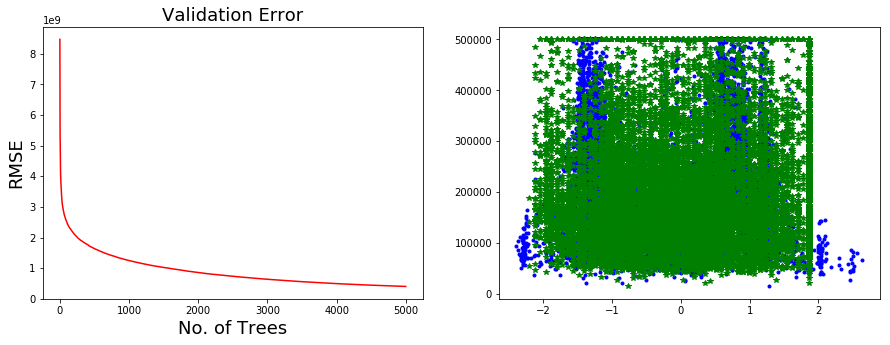

In [57]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(val_error,"r-")
plt.title("Validation Error",fontsize=18)
plt.xlabel("No. of Trees",fontsize=18)
plt.ylabel("RMSE",fontsize=18,rotation=90)
plt.subplot(122)
plt.plot(train[:,0],ys_train,"b.")
plt.plot(train[:,1],ys_train,"g*")
plt.show()

In [58]:
np.random.seed(42)
X=np.random.rand(1000,1)-0.5
y=3*X[:,0]**3+2*X[:,0]**2+0.05*np.random.randn(1000)

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [60]:
gbr_reg=GradientBoostingRegressor(max_depth=2,warm_start=True)
min_error=float(np.inf)

In [61]:
all_errors=[]
for i in range(1,50):
    gbr_reg.n_estimators=i
    gbr_reg.fit(X_train,y_train)
    y_predict=gbr_reg.predict(X_train)
    error=mean_squared_error(y_train,y_predict)
    all_errors.append(error)
    if error<min_error:
        min_error=error
        error_going_up=0
    else:
        error_going_up+=1
        if error_going_up==5:
            print(i)
            break

In [62]:
gbr_reg=GradientBoostingRegressor(max_depth=2,subsample=0.25,learning_rate=0.25)

In [63]:
import xgboost
xboost=xgboost.XGBRegressor(n_estimators=500)
xboost.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=5)
y_predict=xboost.predict(X_test)
mean_squared_error(y_test,y_predict)

[22:14:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.349311
Will train until validation_0-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:0.315088
[2]	validation_0-rmse:0.284403
[3]	validation_0-rmse:0.256871
[4]	validation_0-rmse:0.232409
[5]	validation_0-rmse:0.210439
[6]	validation_0-rmse:0.190672
[7]	validation_0-rmse:0.173262
[8]	validation_0-rmse:0.157468
[9]	validation_0-rmse:0.143672
[10]	validation_0-rmse:0.131361
[11]	validation_0-rmse:0.120299
[12]	validation_0-rmse:0.110632
[13]	validation_0-rmse:0.102024
[14]	validation_0-rmse:0.0945
[15]	validation_0-rmse:0.087922
[16]	validation_0-rmse:0.08221
[17]	validation_0-rmse:0.077321
[18]	validation_0-rmse:0.072988
[19]	validation_0-rmse:0.069344
[20]	validation_0-rmse:0.066205
[21]	validation_0-rmse:0.063485
[22]	validation_0-rmse:0.061258
[23]	validation_0-rmse:0.059456
[24]	validation_0

0.002637572737798032

In [64]:
df_train=X_train.ravel()
shuffled_indices=np.random.permutation(len(df_train))
split_size=int(len(df_train)/4)
X_sub1=df_train[shuffled_indices[:split_size]].reshape(-1,1)
y_sub1=y_train[shuffled_indices[:split_size]]

X_sub2=df_train[shuffled_indices[split_size:-(2*split_size)]].reshape(-1,1)
y_sub2=y_train[shuffled_indices[split_size:-(2*split_size)]]

X_sub3=df_train[shuffled_indices[(2*split_size):-split_size]].reshape(-1,1)
y_sub3=y_train[shuffled_indices[(2*split_size):-split_size]]

X_sub4=df_train[shuffled_indices[:-split_size]].reshape(-1,1)
y_sub4=y_train[shuffled_indices[:-split_size]]

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

lin_reg=LinearRegression()
svm_reg=LinearSVR(C=0.9)
tree_reg=DecisionTreeRegressor(max_depth=2)

lin_reg.fit(X_sub1,y_sub1)
svm_reg.fit(X_sub1,y_sub1)
tree_reg.fit(X_sub1,y_sub1)

sub2_predict1=lin_reg.predict(X_sub2)
sub2_predict2=svm_reg.predict(X_sub2)
sub2_predict3=tree_reg.predict(X_sub2)

new_training_instance1=np.c_[sub2_predict1,sub2_predict2,sub2_predict3]

lin_reg.fit(X_sub3,y_sub3)
svm_reg.fit(X_sub3,y_sub3)
tree_reg.fit(X_sub3,y_sub3)

sub4_predict1=lin_reg.predict(X_sub4)
sub4_predict2=svm_reg.predict(X_sub4)
sub4_predict3=tree_reg.predict(X_sub4)

new_training_instance2=np.c_[sub4_predict1,sub4_predict2,sub4_predict3]

rmd_reg=RandomForestRegressor(n_estimators=10,max_depth=2,min_samples_split=50)
extra_reg=ExtraTreesRegressor(n_estimators=10,max_depth=2,min_samples_split=50)

rmd_reg.fit(new_training_instance1,y_sub2)
extra_reg.fit(new_training_instance2,y_sub4)

rmd_reg.predict(new_training_instance1)
extra_reg.predict(new_training_instance2)

array([0.47760323, 0.50559734, 0.72016546, 0.06918795, 0.06918795,
       0.09146989, 0.09146989, 0.09146989, 0.27717134, 0.06918795,
       0.50559734, 0.44576584, 0.06918795, 0.50559734, 0.27717134,
       0.06918795, 0.06918795, 0.09146989, 0.09146989, 0.44576584,
       0.09146989, 0.72016546, 0.15935046, 0.06918795, 0.06918795,
       0.06918795, 0.08262793, 0.06918795, 0.06918795, 0.06918795,
       0.08262793, 0.09146989, 0.09146989, 0.09146989, 0.09146989,
       0.09146989, 0.09146989, 0.06918795, 0.72016546, 0.06918795,
       0.21959   , 0.09146989, 0.09146989, 0.06918795, 0.24185551,
       0.09146989, 0.06918795, 0.09146989, 0.27717134, 0.15935046,
       0.06918795, 0.15935046, 0.09146989, 0.06918795, 0.06918795,
       0.09146989, 0.07611373, 0.72016546, 0.72016546, 0.09146989,
       0.15935046, 0.06918795, 0.06918795, 0.07611373, 0.44576584,
       0.06918795, 0.06918795, 0.06918795, 0.09146989, 0.06918795,
       0.09146989, 0.06918795, 0.44576584, 0.72016546, 0.06918

In [66]:
from sklearn.ensemble import BaggingRegressor
bg_reg=BaggingRegressor(DecisionTreeRegressor(),n_estimators=100,bootstrap=False,random_state=42)
bg_reg.fit(X_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         bootstrap=False, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=None, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

In [4]:
import sklearn.datasets as dataset
from sklearn.svm import SVC
mnist=dataset.fetch_openml('mnist_784',version=1)

In [5]:
def train_test_val_split(X,y,test_size,val_size):
    shuffled_indices=np.random.permutation(len(X))
    if(test_size<1):
        test_size=int(test_size*len(X))
    if(val_size<1):
        val_size=int(val_size*len(X))
    train_size=len(X)-test_size-val_size
    X_train=X[shuffled_indices[:train_size]]
    y_train=y[shuffled_indices[:train_size]]
    X_val=X[shuffled_indices[train_size:(train_size+val_size)]]
    y_val=y[shuffled_indices[train_size:(train_size+val_size)]]
    X_test=X[shuffled_indices[(train_size+val_size):]]
    y_test=y[shuffled_indices[(train_size+val_size):]]
    return X_train, X_val, X_test, y_train, y_val, y_test

In [6]:
np.random.seed(42)
X=mnist['data']
y=mnist['target']
X_train, X_val,X_test,y_train,y_val,y_test=train_test_val_split(X,y,10000,10000)

In [8]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
tree_clf=DecisionTreeClassifier(max_depth=2)
rand_clf=RandomForestClassifier(n_estimators=10,max_depth=2, n_jobs=-1)
extra_clf=ExtraTreesClassifier(n_estimators=10,max_depth=2, n_jobs=-1)
svm_clf=SVC(kernel='rbf', gamma='scale', C=0.5)
clf_list=[tree_clf,rand_clf,extra_clf,svm_clf]

In [9]:
for clf_ in clf_list:
    clf_.fit(X_train,y_train)

NameError: name 'scores' is not defined

In [12]:
from sklearn.metrics import accuracy_score
scores=[]
for clf_ in clf_list:
    predict=clf_.predict(X_val)
    scores.append(accuracy_score(y_val,predict))
    print(f"Accuracy of {clf_.__class__.__name__}:{accuracy_score(y_val,predict)}")

Accuracy of DecisionTreeClassifier:0.3451
Accuracy of RandomForestClassifier:0.5609
Accuracy of ExtraTreesClassifier:0.5085
Accuracy of SVC:0.9735


In [14]:
from sklearn.ensemble import VotingClassifier
vote_hard_clf=VotingClassifier([('tree', tree_clf),('rand',rand_clf),('extra',extra_clf),('svm',svm_clf)],voting='hard')
#vote_soft_clf=VotingClassifier([('tree', tree_clf),('rand',rand_clf),('extra',extra_clf),('svm',svm_clf)],voting='soft')

In [15]:
vote_hard_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('tree', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [17]:
vote_predict=vote_hard_clf.predict(X_val)

In [19]:
accuracy_score(y_val,vote_predict)

0.6004